# Analysis_2
- count the pokemon appear rate 
- find the most possible time of the day when rare pokemon showes up 

In [101]:
import pandas as pd
from pandas import Series, DataFrame

# 1.Count the pokemon appearance rate 

In [102]:
# basic values of pokemon 
pokemon_data = pd.read_csv('../data/pokemonGO.csv')
pokemon_data.head()

,Pokemon No.,Name,Type 1,Type 2,Max CP,Max HP,Image URL
0,1,Bulbasaur,Grass,Poison,1079,83,http://cdn.bulbagarden.net/upload/thumb/2/21/0...
1,2,Ivysaur,Grass,Poison,1643,107,http://cdn.bulbagarden.net/upload/thumb/7/73/0...
2,3,Venusaur,Grass,Poison,2598,138,http://cdn.bulbagarden.net/upload/thumb/a/ae/0...
3,4,Charmander,Fire,NaN,962,73,http://cdn.bulbagarden.net/upload/thumb/7/73/0...
4,5,Charmeleon,Fire,NaN,1568,103,http://cdn.bulbagarden.net/upload/thumb/4/4a/0...


In [103]:
# Dataset consists of roughly 293,000 historical appearances of Pokemon
GO_data = pd.read_csv('../data/300k.csv')
GO_data.head()

/home/pandakillalot/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (49) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,pokemonId,latitude,longitude,appearedLocalTime,_id,cellId_90m,cellId_180m,cellId_370m,cellId_730m,cellId_1460m,...,cooc_143,cooc_144,cooc_145,cooc_146,cooc_147,cooc_148,cooc_149,cooc_150,cooc_151,class
0,16,20.525745,-97.460829,2016-09-08T03:57:45,NTgxMDkzOTk4MTM5MjUwMjIzNw==,9645139108510564000,9645139108711890000,9645139108443455000,9645139109517197000,9645139113812165000,...,False,False,False,False,False,False,False,False,False,16
1,133,20.523695,-97.461167,2016-09-08T03:57:37,OTQ1NDgzODc1MjM3NDEzMTI2MQ==,9645139109852742000,9645139109785633000,9645139110590940000,9645139109517197000,9645139113812165000,...,False,False,False,False,False,False,False,False,False,133
2,16,38.903590,-77.199780,2016-09-08T03:57:25,NTQ0OTQ0NDA1Nzg2ODg3OTg2OQ==,9923201472785285000,9923201472986612000,9923201473791918000,9923201477013144000,9923201481308110000,...,False,False,False,False,False,False,False,False,False,16
3,13,47.665903,-122.312561,2016-09-08T03:56:22,NTU2MTU1NDM4NzA2MDk1MDcxNw==,6093392705025474600,6093392705092583400,6093392705897889800,6093392702676664300,6093392715561566200,...,False,False,False,False,False,False,False,False,False,13
4,133,47.666454,-122.311628,2016-09-08T03:56:08,MTY2ODg4MTAzMTczMDE0MTUwNTM=,6093392707709829100,6093392707776938000,6093392708045373400,6093392711266598900,6093392715561566200,...,False,False,False,False,False,False,False,False,False,133


In [104]:
total_appearance = GO_data.shape[0]
print('Total',total_appearance, "records")

Total 296021 records


In [105]:
temp = pd.merge(GO_data, pokemon_data, left_on=GO_data.pokemonId, right_on="Pokemon No.")

In [106]:
temp.head()

,pokemonId,latitude,longitude,appearedLocalTime,_id,cellId_90m,cellId_180m,cellId_370m,cellId_730m,cellId_1460m,...,cooc_150,cooc_151,class,Pokemon No.,Name,Type 1,Type 2,Max CP,Max HP,Image URL
0,16,20.525745,-97.460829,2016-09-08T03:57:45,NTgxMDkzOTk4MTM5MjUwMjIzNw==,9645139108510564000,9645139108711890000,9645139108443455000,9645139109517197000,9645139113812165000,...,False,False,16,16,Pidgey,Normal,Flying,684,75,http://cdn.bulbagarden.net/upload/thumb/5/55/0...
1,16,38.903590,-77.199780,2016-09-08T03:57:25,NTQ0OTQ0NDA1Nzg2ODg3OTg2OQ==,9923201472785285000,9923201472986612000,9923201473791918000,9923201477013144000,9923201481308110000,...,False,False,16,16,Pidgey,Normal,Flying,684,75,http://cdn.bulbagarden.net/upload/thumb/5/55/0...
2,16,26.235552,-98.197249,2016-09-08T03:53:40,MTU5OTc0OTgzNTg4MTA4MDE4OQ==,9684323728313287000,9684323728514613000,9684323729319920000,9684323728246178000,9684323715361276000,...,False,False,16,16,Pidgey,Normal,Flying,684,75,http://cdn.bulbagarden.net/upload/thumb/5/55/0...
3,16,20.526489,-97.460745,2016-09-08T03:51:50,MTM4NjE0MjU4NTcwNDkyMzgzMDE=,9645139108376347000,9645139108175020000,9645139108443455000,9645139109517197000,9645139113812165000,...,False,False,16,16,Pidgey,Normal,Flying,684,75,http://cdn.bulbagarden.net/upload/thumb/5/55/0...
4,16,20.524930,-97.460406,2016-09-08T03:49:53,MzUyMjIwNTA5NzAwMzczMzE0OQ==,9645139110255395000,9645139110322504000,9645139110590940000,9645139109517197000,9645139113812165000,...,False,False,16,16,Pidgey,Normal,Flying,684,75,http://cdn.bulbagarden.net/upload/thumb/5/55/0...


In [107]:
# appearance rate = (number of appearance)/(number of records)
aps = temp.groupby('pokemonId').count()
s_appearance = aps.latitude/300000 * 100

In [108]:
pokemon_data = pokemon_data.drop([143,144,145,149,150],axis = 0)
pokemon_data = pokemon_data.set_index(['Pokemon No.'])

In [109]:
pokemon_data['appear_rate'] = s_appearance
pokemon_data.sort(columns='Max CP', axis=0, ascending=True)
pokemon_data.head()

/home/pandakillalot/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,Name,Type 1,Type 2,Max CP,Max HP,Image URL,appear_rate
Pokemon No.,,,,,,,
1,Bulbasaur,Grass,Poison,1079,83,http://cdn.bulbagarden.net/upload/thumb/2/21/0...,0.456000
2,Ivysaur,Grass,Poison,1643,107,http://cdn.bulbagarden.net/upload/thumb/7/73/0...,0.033333
3,Venusaur,Grass,Poison,2598,138,http://cdn.bulbagarden.net/upload/thumb/a/ae/0...,0.004000
4,Charmander,Fire,NaN,962,73,http://cdn.bulbagarden.net/upload/thumb/7/73/0...,0.246000
5,Charmeleon,Fire,NaN,1568,103,http://cdn.bulbagarden.net/upload/thumb/4/4a/0...,0.007667


In [110]:
pokemon_data.to_csv('ana_2_all_appearance.csv', encoding='utf-8')

In [111]:
pokemon_data['appear_rate'] = pokemon_data['appear_rate']*10000

In [112]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

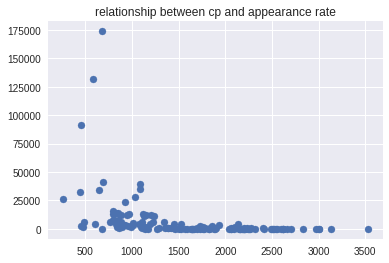

In [113]:
# boxplot
plt.scatter(pokemon_data['Max CP'], pokemon_data['appear_rate'])
plt.title('relationship between cp and appearance rate')

In [131]:
fig.savefig('ana_2_cp_ap.png')

In [115]:
df_poke_best['appear_rate'] = pokemon_data['appear_rate'] 

In [116]:
df_poke_best.head()

,Type 1,Name,Total_values,appear_rate
Pokemon No.,,,,
149,Dragon,Dragonite,3649.8,80.000000
143,Normal,Snorlax,3347.0,243.333333
131,Water,Lapras,3176.4,66.666667
59,Fire,Arcanine,3128.2,106.666667
103,Grass,Exeggutor,3105.6,96.666667


In [117]:
df_poke_best.to_csv('ana_2_best_appearance.csv', encoding='utf-8')

# 2. Count the appearance rate of different time periods

In [118]:
# return a list which contains [id, afternoon_times,evening_times, morning_times, night_times]
def count_time(id,df): 
    df = df[df.pokemonId == id]
    time = df.groupby('appearedTimeOfDay').count()
    for x in ['afternoon', 'night','eveing','morning']:
        if x not in time.pokemonId.index:
            time.pokemonId.set_value(x,0)
    sss = time.pokemonId.sort_index()
    l = list(sss.values)
    l.insert(0,id)
    return l

In [119]:
rare_poke_list = df_poke_best.index

In [120]:
l = []
for x in rare_poke_list:
    l.append(count_time(x,temp))

In [121]:
def turn_in_df(id_list,df_temp):
    # count appearance rate
    l = []
    for x in id_list:
        l.append(count_time(x,df_temp))
    #turn lists into series 
    l_no = []
    l_morn = []
    l_after = []
    l_evening = []
    l_night = []
    for x in l:
        l_no.append(x[0])
        l_morn.append(x[1])
        l_after.append(x[2])
        l_evening.append(x[3])
        l_night.append(x[4])
    df1 = pd.DataFrame({'Pokemon No.':l_no,'l_morn':l_morn,'l_after':l_after,'l_evening':l_evening,'l_night':l_night})
    df1['sum'] = df1.l_after + df1.l_evening + df1.l_morn + df1.l_night
    # from number to percentage
    df1.l_after = df1.l_after / df1['sum']
    df1.l_evening = df1.l_evening / df1['sum']
    df1. l_morn = df1. 	l_morn / df1['sum']
    df1.l_night = df1.l_night / df1['sum']
    # reindexing
    del df1['sum']
    df1 = df1.set_index(['Pokemon No.'])
    return df1

In [122]:
pokemon_data = pd.read_csv('ana_2_output/ana_2_all_appearance.csv')
id_list = pokemon_data['Pokemon No.'].values

In [123]:
df_time = turn_in_df(id_list,temp)
del df_time['l_after']

In [124]:
pokemon_data = pokemon_data.set_index(['Pokemon No.'])
df = pd.DataFrame.join( pokemon_data,df_time)
del df['Image URL']
del df['Type 2']
df.head()

,Name,Type 1,Max CP,Max HP,appear_rate,l_evening,l_morn,l_night
Pokemon No.,,,,,,,,
1,Bulbasaur,Grass,1079,83,0.456000,0.253185,0.291401,0.455414
2,Ivysaur,Grass,1643,107,0.033333,0.279070,0.302326,0.418605
3,Venusaur,Grass,2598,138,0.004000,0.200000,0.200000,0.600000
4,Charmander,Fire,962,73,0.246000,0.298780,0.378049,0.323171
5,Charmeleon,Fire,1568,103,0.007667,0.100000,0.300000,0.600000


In [125]:
df_den = GO_data.groupby('pokemonId').mean()

In [126]:
# population_density
df['population_density']=df_den['population_density']
del df['Max CP']
del df['Max HP']
df.head()

,Name,Type 1,appear_rate,l_evening,l_morn,l_night,population_density
Pokemon No.,,,,,,,
1,Bulbasaur,Grass,0.456000,0.253185,0.291401,0.455414,1851.392773
2,Ivysaur,Grass,0.033333,0.279070,0.302326,0.418605,1867.937864
3,Venusaur,Grass,0.004000,0.200000,0.200000,0.600000,379.295705
4,Charmander,Fire,0.246000,0.298780,0.378049,0.323171,1852.447109
5,Charmeleon,Fire,0.007667,0.100000,0.300000,0.600000,1047.189039


In [127]:
df.to_csv('ana2_2_all_appear&population.csv', encoding='utf-8')

In [128]:
df_best = df.ix[rare_poke_list]

In [129]:
df_best.to_csv('ana2_2_best_appear&population.csv', encoding='utf-8')

In [130]:
df_best = df_best.loc[:,['l_evening','l_morn','l_night']]